You're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. Function: Career & Academic Counseling, or Position_Type: Librarian.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

your goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

#### What type of machine learning problem is this?

Supervised Learning, because the model will be trained using labeled examples.

#### What type of supervised machine learning problem is this?

Classification, because predicted probabilities will be used to select a label class.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
df = pd.read_csv('Datasets/school_budget/TrainingSet.csv')
df.head()

,Unnamed: 0,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.810,KINDERGARTEN,General Fund,NaN
1,206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.860,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES
2,326408,Teacher Compensation,Instruction,School Reported,School,Unspecified,Teacher,Base Salary/Compensation,Non PreK,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,TEACHER,62237.130,Instruction - Regular,General Purpose School,NaN
3,364634,Substitute Compensation,Instruction,School Reported,School,Unspecified,Substitute,Benefits,NO_LABEL,PreK-12 Operating,...,NaN,NaN,NaN,UNALLOC BUDGETS/SCHOOLS,NaN,PROFESSIONAL-INSTRUCTIONAL,22.300,GENERAL MIDDLE/JUNIOR HIGH SCH,NaN,REGULAR INSTRUCTION
4,47683,Substitute Compensation,Instruction,School Reported,School,Unspecified,Teacher,Substitute Compensation,NO_LABEL,PreK-12 Operating,...,NaN,NaN,NaN,NON-PROJECT,NaN,PROFESSIONAL-INSTRUCTIONAL,54.166,GENERAL HIGH SCHOOL EDUCATION,NaN,REGULAR INSTRUCTION


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400277 entries, 0 to 400276
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              400277 non-null  int64  
 1   Function                400277 non-null  object 
 2   Use                     400277 non-null  object 
 3   Sharing                 400277 non-null  object 
 4   Reporting               400277 non-null  object 
 5   Student_Type            400277 non-null  object 
 6   Position_Type           400277 non-null  object 
 7   Object_Type             400277 non-null  object 
 8   Pre_K                   400277 non-null  object 
 9   Operating_Status        400277 non-null  object 
 10  Object_Description      375493 non-null  object 
 11  Text_2                  88217 non-null   object 
 12  SubFund_Description     306855 non-null  object 
 13  Job_Title_Description   292743 non-null  object 
 14  Text_3              

In [13]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting',
        'Student_Type', 'Position_Type', 'Object_Type',
        'Pre_K', 'Operating_Status']

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


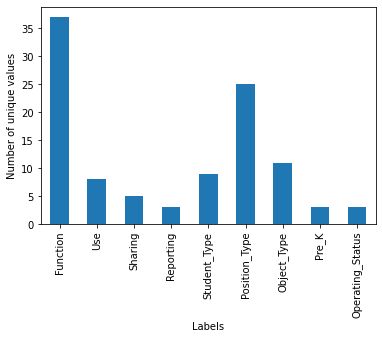

In [14]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()